In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy as sp
sns.set_style("whitegrid")

## Grafico de Dispersión

Este tipo de gráfico nos permite visualizar la relación entre dos variables. Cada punto representa un par de valores para esas variables. Si los puntos forman una línea o un patrón, hay una relación entre las variables. Si los puntos están dispersos, no hay una relación clara. Son útiles para identificar correlaciones y valores atípicos en los datos.

Los diagramas de dispersión son ideales cuando se tienen datos numéricos emparejados y se desea ver si una variable afecta a la otra.La ubicación de los puntos en el gráfico de dispersión proporciona información sobre la relación entre las dos variables. Si los puntos se agrupan en una forma o patrón definido, indica una relación entre las variables. Por ejemplo, si los puntos se agrupan en una línea recta creciente o decreciente, indica una relación lineal entre las variables. Si los puntos no siguen un patrón claro y están dispersos al azar, indica una falta de relación o una relación no lineal entre las variables.
<center><img width="800" height="600" src='img/correlaciones.png' alt='Gráficos dispersión'></center>


In [2]:
df = pd.read_csv('./datasets/pinguinos.csv')
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [3]:
df.isna().sum().sort_values(ascending=False)

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.shape

(334, 7)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

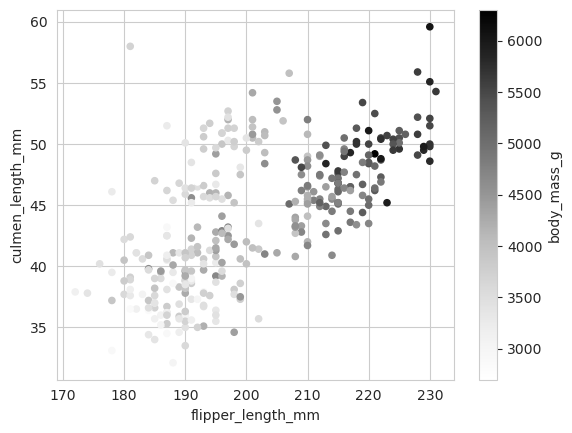

In [6]:
# Graficamos con pandas

df.plot.scatter(
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    c='body_mass_g'
)

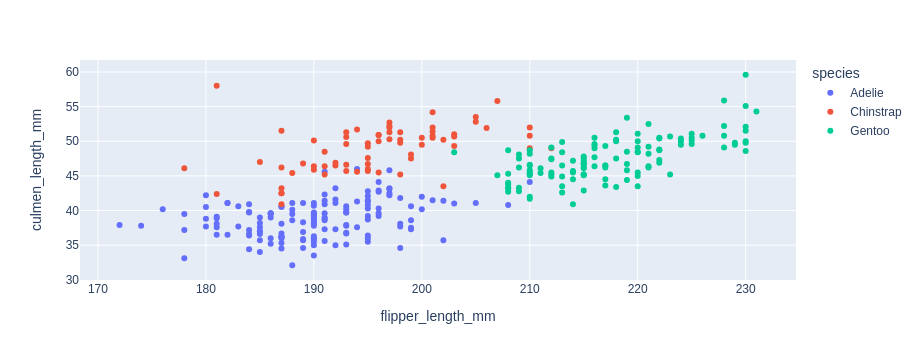

In [7]:
# Graficamos con plotly

fig = px.scatter(
    df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    color = 'species'
)
fig.show()


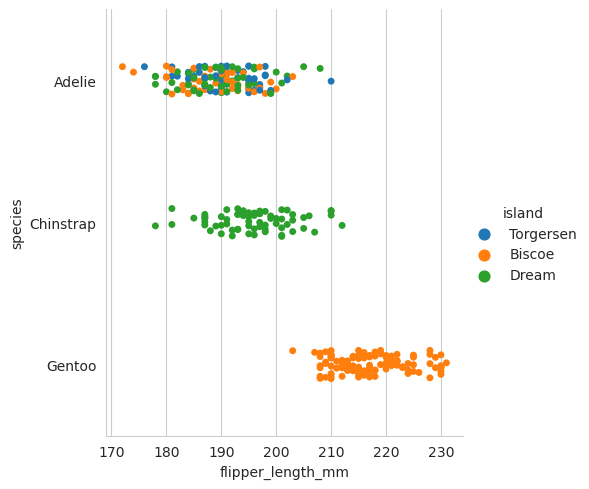

In [8]:
# Graficamos con seaborn

# visualizacion con variable categorica
sns.catplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'species',
    hue = 'island'
)

## Graficos de Regresión

Los gráficos de regresión tienen similitud con los gráficos de dispersión, ya que igualmente nos ayudan a visualizar la relación entre dos variables con la diferencia que este tiene una línea de tendencia en medio de los puntos que nos permitirá predecir el valor de 'Y' dado un hipotético valor de 'X', para este gráfico las variables tiene que ser numéricas.

En un gráfico de regresión, se muestra la dispersión de los puntos de datos en un plano cartesiano, donde una variable se representa en el eje horizontal (variable independiente) y la otra en el eje vertical (variable dependiente). Además de los puntos de datos individuales, se traza una línea o una curva que representa la relación estimada entre las variables,puede ayudar a identificar patrones, tendencias y posibles valores atípicos en los datos. También puede proporcionar una estimación visual de cómo se espera que la variable dependiente cambie a medida que varía la variable independiente.



In [9]:
# calculamos coefeciente correlacion lineal entre variables con scipy

r,p = sp.stats.pearsonr(df['flipper_length_mm'],df['culmen_length_mm'])
r,p

(0.6521257442177317, 7.874576982844467e-42)

Text(220, 35, 'r= 0.65')

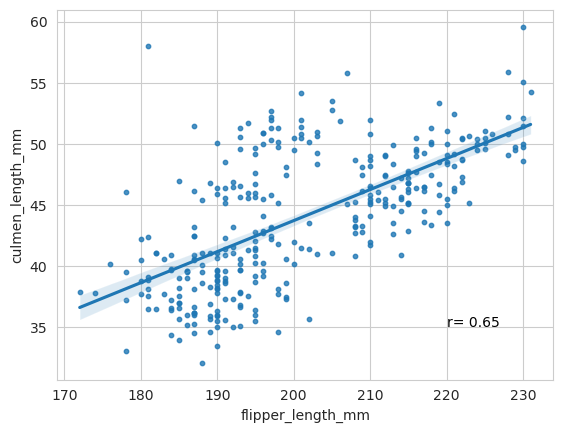

In [10]:
# grafiacamos con seaborn

sns.regplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    # reducir tamaño de los puntos
    scatter_kws={
        's':10
    }
)
texto = 'r= ' + str(r)[:4]
plt.text(220,35, texto, color='black')

## Graficos Joinplot


Los gráficos joinplot nos muestran la relación entre dos variables numéricas. Combina histogramas y gráficos de dispersión para mostrar cómo se distribuyen los valores de cada variable y cómo se relacionan entre sí. Es útil para identificar patrones, correlaciones y valores atípicos en los datos.

Un joinplot muestra simultáneamente la distribución univariable de cada variable en forma de histograma o gráfico de densidad, y la relación entre las dos variables en forma de un gráfico de dispersión o contorno.

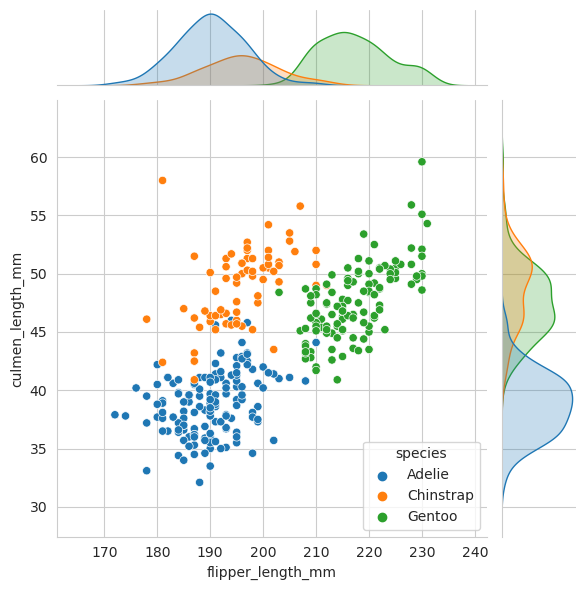

In [11]:
# Graficamos con seaborn

sns.jointplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    hue = 'species'
)

## Grafico Pairplot

El gráfico compuesto pairplot es utilizado en el análisis de datos y estadísticas para explorar la relación entre múltiples variables numéricas. También se conoce como "gráfico de matriz de dispersión" o "gráfico de relaciones múltiples".

Un pairplot muestra simultáneamente la comparacion las distribuciones univariables de cada variable en forma de histogramas o gráficos de densidad en la diagonal principal de la matriz, y las relaciones bivariables entre las variables en las celdas fuera de la diagonal principal en forma de gráficos de dispersión,los pairplots son especialmente útiles para visualizar rápidamente las correlaciones entre múltiples variables y detectar patrones o agrupamientos en los datos. También pueden ayudar a identificar variables que podrían estar relacionadas y merecen un análisis más detallado.


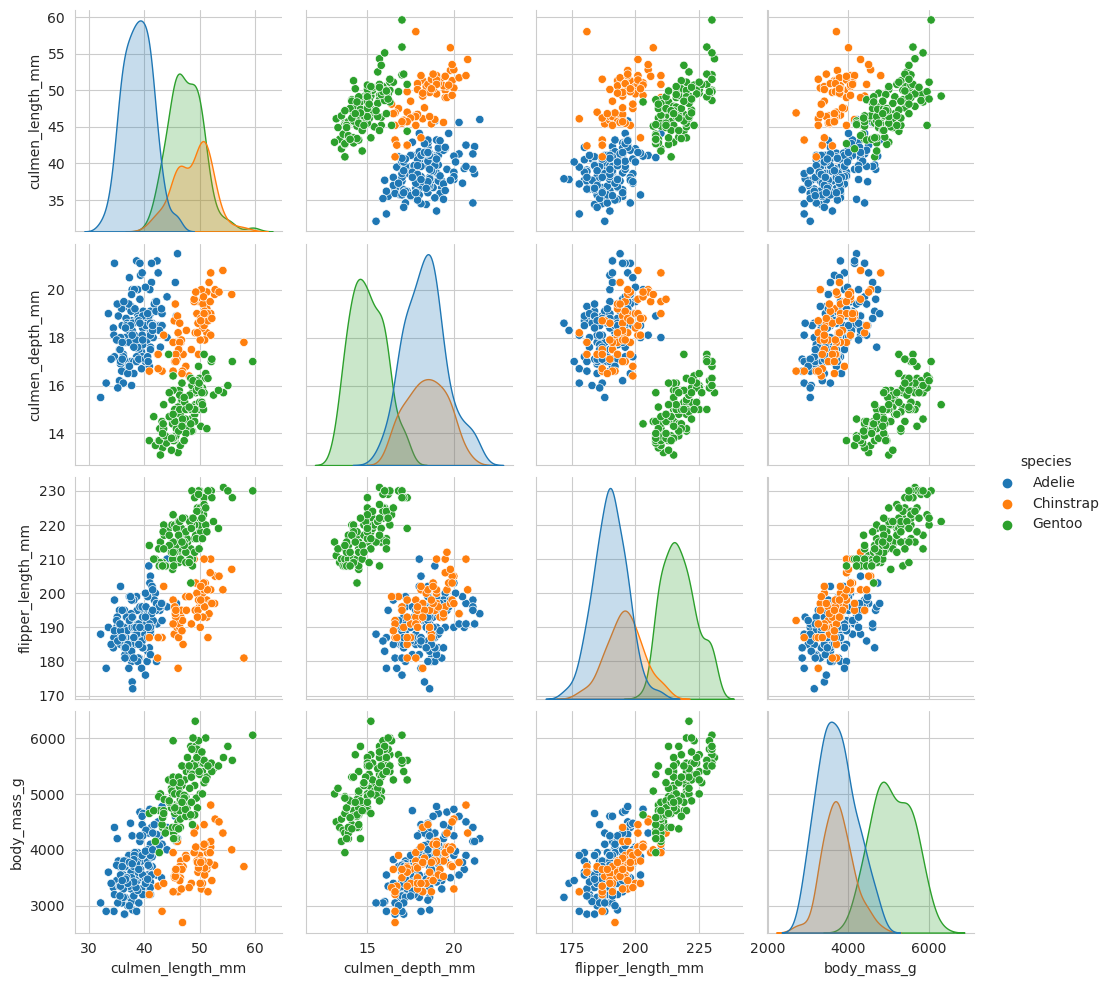

In [12]:
# Graficamos con seaborn

sns.pairplot(
    data= df,
    hue = 'species'
)

## Graficos de Radar

También conocido como gráfico de estrella es una representación visual que muestra diferentes variables y cómo se comparan entre sí. Se utiliza un diagrama circular con ejes radiantes para representar cada variable, y las líneas conectan los puntos correspondientes a cada variable. Ayuda a visualizar y comparar características de diferentes elementos en un formato fácil de entender.

Donse se pueden utilizar los gráficos de radar:

- Para comparar el rendimiento de diferentes productos o servicios.
- Para mostrar los cambios en los resultados de una prueba a lo largo del tiempo.
- Para comparar las diferentes características de diferentes productos.
- Para mostrar los diferentes resultados de diferentes experimentos.

Los gráficos de radar son una herramienta versátil que se puede utilizar para presentar datos de una manera clara y concisa. 

In [13]:
df_radar = pd.read_csv('./datasets/restaurantes.csv')
df_radar

Nombre  Comida  Variedad  Servicio  Ambiente  Precio
0  Restaurante 1       4         4         5         4       3
1  Restaurante 2       5         5         4         5       2
2  Restaurante 3       3         4         5         3       5

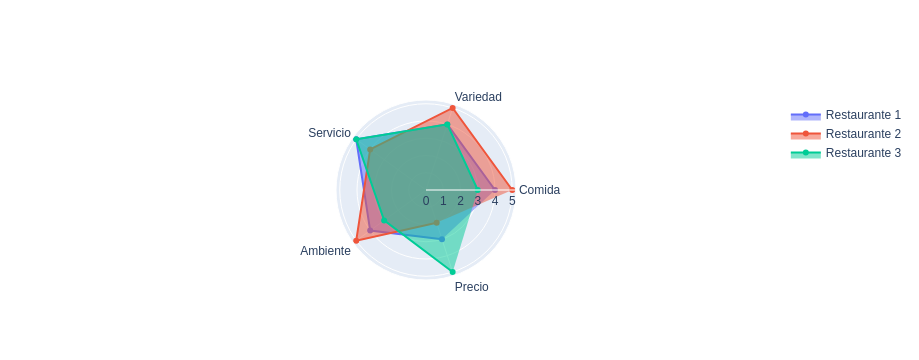

In [14]:
categorias = ['Comida','Variedad','Servicio','Ambiente','Precio']

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[0, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 1'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[1, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 2'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = df_radar.iloc[2, 1:],
        theta = categorias,
        fill= 'toself',
        name = 'Restaurante 3'
    )
)
fig.show()

Comparar medida promedio de las tres especies de pinguinos

In [15]:
agrupado_pinguinos = df.groupby('species').mean()
agrupado_pinguinos


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie            38.823973        18.347260         190.102740  3706.164384
Chinstrap         48.833824        18.420588         195.823529  3733.088235
Gentoo            47.542500        15.002500         217.233333  5090.625000

In [16]:
categorias_pinguinos = agrupado_pinguinos.columns

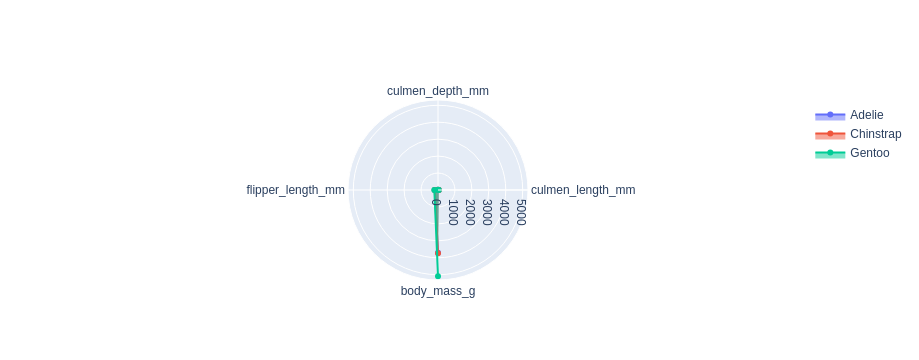

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[0, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Adelie'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[1, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Chinstrap'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r = agrupado_pinguinos.iloc[2, :],
        theta = categorias_pinguinos,
        fill= 'toself',
        name = 'Gentoo'
    )
)
fig.show()

Se requiere normalizar los valores de las variables

In [18]:
df2 = df[categorias_pinguinos]
df_norm = (df2-df2.min())/(df2.max()-df2.min())
df_norm['species'] = df['species']
df_norm

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g species
0            0.254545         0.666667           0.152542     0.291667  Adelie
1            0.269091         0.511905           0.237288     0.305556  Adelie
2            0.298182         0.583333           0.389831     0.152778  Adelie
4            0.167273         0.738095           0.355932     0.208333  Adelie
5            0.261818         0.892857           0.305085     0.263889  Adelie
..                ...              ...                ...          ...     ...
338          0.549091         0.071429           0.711864     0.618056  Gentoo
340          0.534545         0.142857           0.728814     0.597222  Gentoo
341          0.665455         0.309524           0.847458     0.847222  Gentoo
342          0.476364         0.202381           0.677966     0.694444  Gentoo
343          0.647273         0.357143           0.694915     0.750000  Gentoo

[334 rows x 5 columns]

In [19]:
agrupado_norm = df_norm.groupby('species').mean()
agrupado_norm

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie             0.244508         0.624674           0.306826     0.279490
Chinstrap          0.608503         0.633403           0.403789     0.286969
Gentoo             0.561545         0.226488           0.766667     0.664062

In [20]:
adelie2 = list(agrupado_norm.loc['Adelie', :])
chinstrap2 = list(agrupado_norm.loc['Chinstrap', :])
gentoo2 = list(agrupado_norm.loc['Gentoo', :])

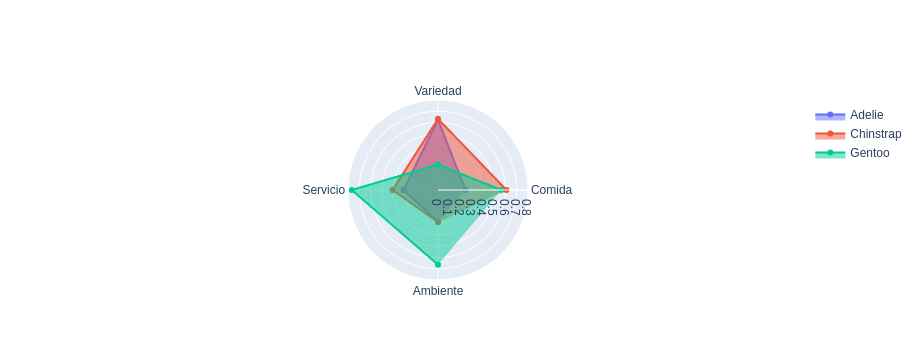

In [21]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie2,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap2,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo2,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()

## Graficos de Borbujas

Los gráficos de burbuja podríamos decir que es exactamente lo mismo que un gráfico de dispersión(scartter plot) con la diferencia que se le introduce una tercera variable de tipo numérica a través del tamaño de cada punto individual, los puntos irán creciendo de manera que codifique el valor de dicha variable, también se le puede introducir una cuarta variable de tipo categórica el cual me va a diferenciar el color de las burbujas.

In [22]:
df_paises = pd.read_csv('./datasets/paises_vida.csv', index_col='index')
df_paises = df_paises.dropna()
df_paises

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
index                                                                         
0      Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1      Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2      Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3      Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4      Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...            ...       ...   ...      ...       ...         ...       ...   
1699      Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700      Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701      Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702      Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703      Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

       iso_num  
index           
0            4  
1            4  
2            4  
3            4  
4            4  
...        ...  
1699       716  
1700       716  
1701       716  
1702       716  
1703       716  

[1704 rows x 8 columns]

¿Encontrar si existe una correlacion entre la espectativa de vida, el producto interno bruto,  y la poblacion de los paises en el año 2002?

In [23]:
df_2002 = df_paises[df_paises['year'] == 2002]
df_2002

country continent  year  lifeExp       pop    gdpPercap  \
index                                                                       
10            Afghanistan      Asia  2002   42.129  25268405   726.734055   
22                Albania    Europe  2002   75.651   3508512  4604.211737   
34                Algeria    Africa  2002   70.994  31287142  5288.040382   
46                 Angola    Africa  2002   41.003  10866106  2773.287312   
58              Argentina  Americas  2002   74.340  38331121  8797.640716   
...                   ...       ...   ...      ...       ...          ...   
1654              Vietnam      Asia  2002   73.017  80908147  1764.456677   
1666   West Bank and Gaza      Asia  2002   72.370   3389578  4515.487575   
1678          Yemen, Rep.      Asia  2002   60.308  18701257  2234.820827   
1690               Zambia    Africa  2002   39.193  10595811  1071.613938   
1702             Zimbabwe    Africa  2002   39.989  11926563   672.038623   

      iso_alpha  iso_num  
index                     
10          AFG        4  
22          ALB        8  
34          DZA       12  
46          AGO       24  
58          ARG       32  
...         ...      ...  
1654        VNM      704  
1666        PSE      275  
1678        YEM      887  
1690        ZMB      894  
1702        ZWE      716  

[142 rows x 8 columns]

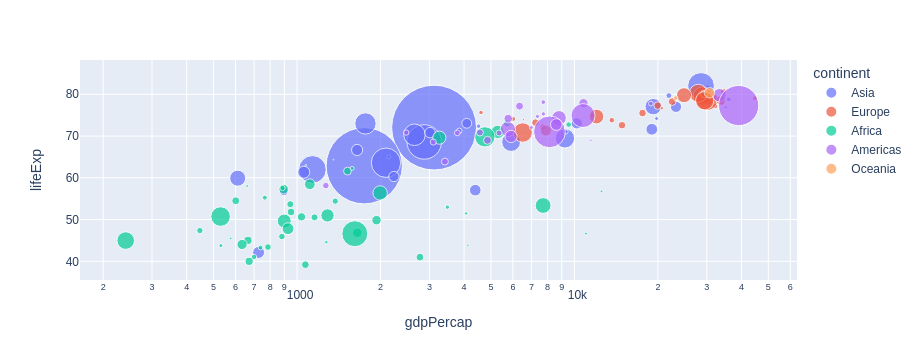

In [24]:
# Graficamos en plotly

fig = px.scatter(
    df_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    size_max=60,
    log_x=True, # escala logaritmica ver grafico con dist exponencial en forma lineal
    color='continent',
    hover_name='country'
)

fig.show()

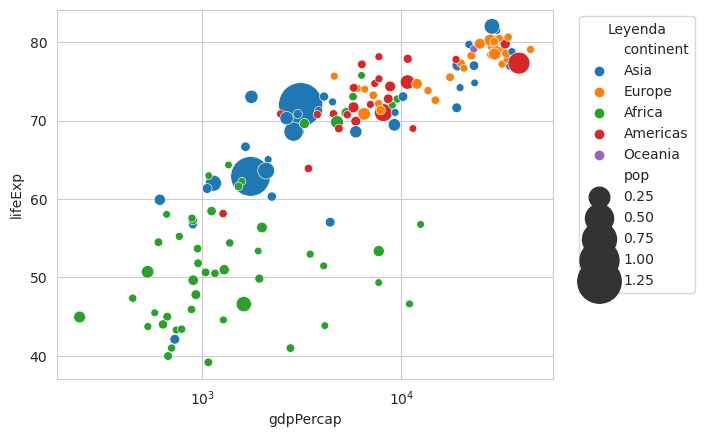

In [25]:
# Graficamos con seaborn

sns.scatterplot(
    data = df_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    hue='continent',
    sizes=(30,1000),
    legend=True
)

plt.xscale('log')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right', title='Leyenda')

## Graficos de Lineas Dobles

Un gráfico de línea doble es un tipo de gráfico que muestra dos series de datos en la misma línea de tiempo. Las dos líneas se pueden utilizar para comparar dos conjuntos de datos diferentes o para mostrar cómo cambia un conjunto de datos a lo largo del tiempo y esto lo logra añadiendo un segundo eje Y con una escala totalmente diferente al primero.

¿Analizar en Asia como ha cambiado la expectativa de vida y el GDP per Capita?

In [26]:
df_asia = df_paises[df_paises['continent']== 'Asia'] # filtramos paises de Asia
df_asia_agrupado = df_asia.groupby('year').agg({
    'lifeExp':'mean',
    'gdpPercap':'mean'
    
})# agrupamos por año

df_asia_agrupado

lifeExp     gdpPercap
year                         
1952  46.314394   5195.484004
1957  49.318544   5787.732940
1962  51.563223   5729.369625
1967  54.663640   5971.173374
1972  57.319269   8187.468699
1977  59.610556   7791.314020
1982  62.617939   7434.135157
1987  64.851182   7608.226508
1992  66.537212   8639.690248
1997  68.020515   9834.093295
2002  69.233879  10174.090397
2007  70.728485  12473.026870

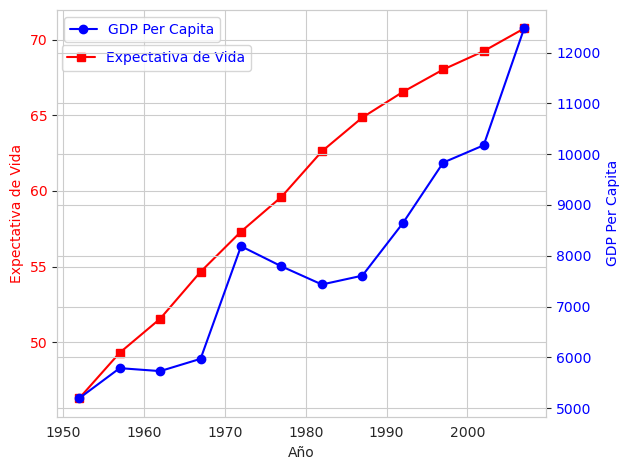

In [27]:
# Graficamos con matplolib

fig, ax1 = plt.subplots()

ax1.set_xlabel('Año')
ax1.set_ylabel('Expectativa de Vida', color='red')
ax1.plot(    
    df_asia_agrupado.index.values, 
    df_asia_agrupado['lifeExp'],  
    color='red',
    marker='s'
)
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('GDP Per Capita', color='blue')  
ax2.plot(
    df_asia_agrupado.index.values, 
    df_asia_agrupado['gdpPercap'], 
    color='blue',
    marker='o'
)
ax2.tick_params(axis='y', labelcolor='blue')

ax2.legend(
    title='',
    labels=['GDP Per Capita'],
    labelcolor=['blue']
)

ax1.legend(
    bbox_to_anchor=(0.41,0.93),
    title='',
    labels=['Expectativa de Vida'],
    labelcolor=['blue']
)

fig.tight_layout()  
plt.show()

## Graficos de Barras y Lineas

Es un gráfico compuesto, por un gráfico de barra y de línea, este segundo va a estar delimitado por un segundo eje Y, nos sirve para comparar la variación de ciertas magnitudes a través del diagrama de barras y al mismo tiempo visualizar la tendencia de otras variables a través del gráfico de línea.

¿Visualizar como ha cambiado a lo largo de los años la expectativa de vida y el GPD percapita promedio del contiente africano?

In [28]:
df_paises.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
index                                                                         
0      Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1      Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2      Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3      Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4      Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

       iso_num  
index           
0            4  
1            4  
2            4  
3            4  
4            4

In [29]:
df_africa = df_paises[df_paises['continent']== 'Africa']
df_africa 

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
index                                                                       
24      Algeria    Africa  1952   43.077   9279525  2449.008185       DZA   
25      Algeria    Africa  1957   45.685  10270856  3013.976023       DZA   
26      Algeria    Africa  1962   48.303  11000948  2550.816880       DZA   
27      Algeria    Africa  1967   51.407  12760499  3246.991771       DZA   
28      Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...         ...       ...   ...      ...       ...          ...       ...   
1699   Zimbabwe    Africa  1987   62.351   9216418   706.157306       ZWE   
1700   Zimbabwe    Africa  1992   60.377  10704340   693.420786       ZWE   
1701   Zimbabwe    Africa  1997   46.809  11404948   792.449960       ZWE   
1702   Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1703   Zimbabwe    Africa  2007   43.487  12311143   469.709298       ZWE   

       iso_num  
index           
24          12  
25          12  
26          12  
27          12  
28          12  
...        ...  
1699       716  
1700       716  
1701       716  
1702       716  
1703       716  

[624 rows x 8 columns]

In [30]:
df_agrupado_africa=df_africa.groupby('year').agg({
    'lifeExp':'mean',
    'pop':'sum',
    'gdpPercap': 'mean'
})
df_agrupado_africa = df_agrupado_africa.reset_index()
df_agrupado_africa

year    lifeExp        pop    gdpPercap
0   1952  39.135500  237640501  1252.572466
1   1957  41.266346  264837738  1385.236062
2   1962  43.319442  296516865  1598.078825
3   1967  45.334538  335289489  2050.363801
4   1972  47.450942  379879541  2339.615674
5   1977  49.580423  433061021  2585.938508
6   1982  51.592865  499348587  2481.592960
7   1987  53.344788  574834110  2282.668991
8   1992  53.629577  659081517  2281.810333
9   1997  53.598269  743832984  2378.759555
10  2002  53.325231  833723916  2599.385159
11  2007  54.806038  929539692  3089.032605

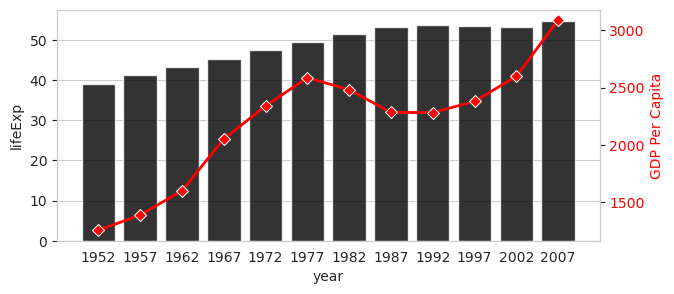

In [31]:
# Graficamos con saborn

fig, ax1 = plt.subplots(figsize=(7,3))

sns.barplot(
    data = df_agrupado_africa,
    x='year',
    y='lifeExp',
    color='Black',
    alpha=0.8,
    ax=ax1
)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_agrupado_africa['gdpPercap'],
    ax=ax2,
    color='red',
    linewidth=2,
    marker='D'
    
)

ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('GDP Per Capita', color = 'red')
ax2.grid(visible=False)

## Graficos de Mapa de Calor(Heatmap)

Un heatmap es una representación visual de datos que utiliza colores para mostrar la intensidad o el valor de una variable en una matriz bidimensional.

Cada celda de la matriz se colorea de acuerdo con el valor numérico correspondiente, lo que permite identificar patrones, tendencias o áreas de alta concentración en los datos de manera rápida y clara, Si las dos variables son categóricas y codifican una variable numérica el Heatmap es una matríz con tantas celdas como valores distintos categoricos tenga en X y en Y. Una celda con una tonalidad mas oscura me indica que el valor de ese punto X vs Y es mayor.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

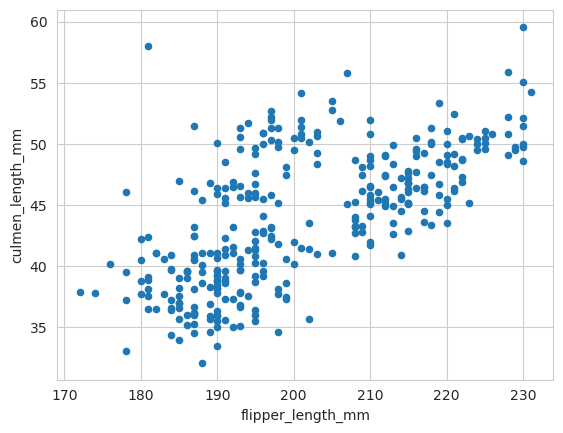

In [32]:
# Graficamos con pandas dataset pinguinos

df.plot.scatter(
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',   
)

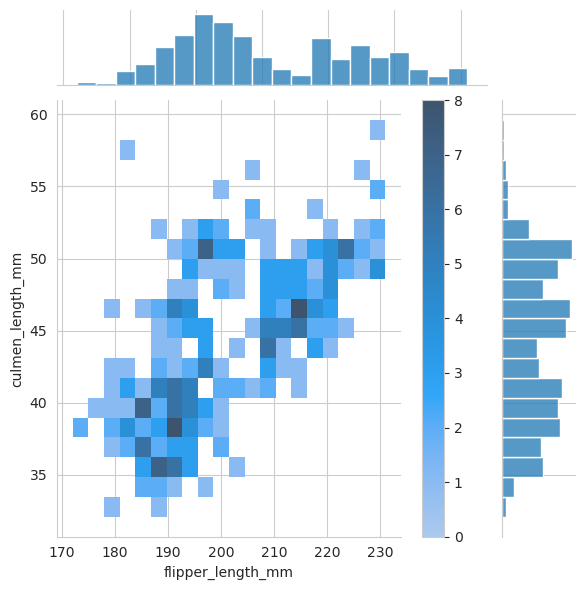

In [33]:
sns.jointplot(
    data=df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    kind='hist',
    joint_kws={
        'bins':20
    },
    marginal_kws={
        "bins":20, 
        "fill":True
    },
    cbar=True
)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

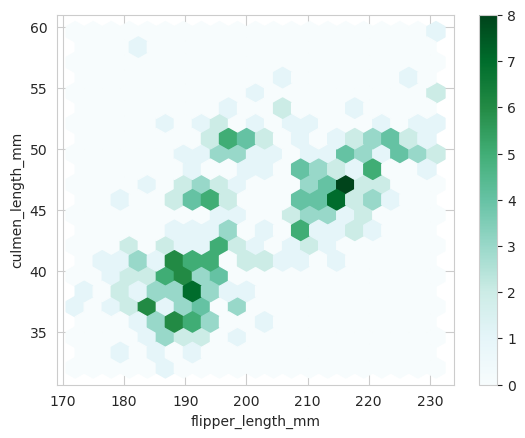

In [34]:
# Graficamos con pandas

df.plot.hexbin(
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    gridsize=20
)

Mapa de calor con variables categoricas

In [35]:
df_tiendas = pd.read_csv('./datasets/tienda_ventas.csv')
df_tiendas= df_tiendas.dropna()
df_tiendas['mes']= df_tiendas['date'].apply(lambda x:x[0:7])
df_tiendas

id        date  store_nbr                      family  \
0              0  2013-01-01          1                  AUTOMOTIVE   
1              1  2013-01-01          1                   BABY CARE   
2              2  2013-01-01          1                      BEAUTY   
3              3  2013-01-01          1                   BEVERAGES   
4              4  2013-01-01          1                       BOOKS   
...          ...         ...        ...                         ...   
2161561  2161561  2016-04-30          9                     POULTRY   
2161562  2161562  2016-04-30          9              PREPARED FOODS   
2161563  2161563  2016-04-30          9                     PRODUCE   
2161564  2161564  2016-04-30          9  SCHOOL AND OFFICE SUPPLIES   
2161565  2161565  2016-04-30          9                     SEAFOOD   

              sales  onpromotion      mes  
0           0.00000            0  2013-01  
1           0.00000            0  2013-01  
2           0.00000            0  2013-01  
3           0.00000            0  2013-01  
4           0.00000            0  2013-01  
...             ...          ...      ...  
2161561   826.35300            0  2016-04  
2161562   165.65399            0  2016-04  
2161563  2012.72700            1  2016-04  
2161564    10.00000            0  2016-04  
2161565    32.18600            3  2016-04  

[2161566 rows x 7 columns]

¿Encontrar la diferencia de las ventas de bebidas a lo largo de los meses?

In [36]:
# Tiendas a evaluar 3,44,45,46,47,48,49,50

In [37]:
df_tiendas_filt = df_tiendas[df_tiendas['store_nbr'].isin([3,44,45,46,47,48,49,50])].groupby(['mes','store_nbr']).agg({
    'sales':'sum'
})
df_tiendas_filt

sales
mes     store_nbr              
2013-01 3          4.965743e+05
        44         6.763951e+05
        45         5.394207e+05
        46         4.851985e+05
        47         5.328300e+05
...                         ...
2016-04 46         9.085644e+05
        47         1.158896e+06
        48         7.901695e+05
        49         1.100845e+06
        50         6.022959e+05

[320 rows x 1 columns]

In [38]:
matrix_mapa_calor= df_tiendas_filt.unstack().droplevel(0,axis=1).transpose()
matrix_mapa_calor

mes              2013-01        2013-02        2013-03        2013-04  \
store_nbr                                                               
3          496574.280985  429618.648974  531686.223879  512072.124974   
44         676395.138954  595527.551012  697303.868000  666954.222780   
45         539420.676079  503479.819965  601584.635970  557200.458882   
46         485198.490116  446971.842070  531634.404456  486555.474044   
47         532830.024953  477916.973850  578854.175901  524800.597078   
48         393039.644168  369976.821263  447756.715286  413425.020003   
49         291891.128982  258320.141966  325003.586018  312894.258091   
50         341249.754079  323027.227966  374337.286047  348366.691837   

mes              2013-05        2013-06        2013-07        2013-08  \
store_nbr                                                               
3          518197.344186  544387.722974  517335.848845  532537.992913   
44         672681.377906  666303.585030  637568.579971  654104.371982   
45         576410.815940  591454.381316  554255.958018  565709.937040   
46         502340.002993  510167.572082  480729.412897  500779.807575   
47         537680.008065  549332.645889  493788.664091  507404.715962   
48         421302.961073  436320.137003  401904.368981  417463.436092   
49         328580.093051  329014.434985  309582.340983  324705.513098   
50         361603.265001  356335.724030  355119.079156  354176.408970   

mes              2013-09        2013-10  ...       2015-07       2015-08  \
store_nbr                                ...                               
3          553040.497954  549129.845189  ...  1.090623e+06  1.104795e+06   
44         685715.165820  664588.899780  ...  1.236124e+06  1.333194e+06   
45         585876.476739  579700.235145  ...  1.119165e+06  1.165197e+06   
46         515900.194888  505165.404070  ...  8.615049e+05  8.265581e+05   
47         571775.975106  568528.162178  ...  1.026461e+06  1.039515e+06   
48         445250.058918  432686.653010  ...  7.349772e+05  7.056176e+05   
49         358836.727011  368756.502042  ...  9.099109e+05  9.706920e+05   
50         360904.547880  361603.736975  ...  5.661308e+05  5.808498e+05   

mes             2015-09       2015-10       2015-11       2015-12  \
store_nbr                                                           
3          1.143363e+06  1.154247e+06  1.131927e+06  1.266646e+06   
44         1.355429e+06  1.384719e+06  1.340310e+06  1.497707e+06   
45         1.111998e+06  1.137089e+06  1.171939e+06  1.350416e+06   
46         8.241437e+05  8.617642e+05  8.470109e+05  1.041412e+06   
47         1.086786e+06  1.131799e+06  1.107007e+06  1.264874e+06   
48         7.154095e+05  7.644686e+05  7.504672e+05  9.127878e+05   
49         1.037610e+06  1.012850e+06  1.006192e+06  1.181605e+06   
50         5.483830e+05  5.767117e+05  5.709456e+05  7.393193e+05   

mes             2016-01       2016-02       2016-03       2016-04  
store_nbr                                                          
3          1.178500e+06  1.050255e+06  1.110348e+06  1.209713e+06  
44         1.383672e+06  1.218532e+06  1.296019e+06  1.501871e+06  
45         1.226709e+06  1.108178e+06  1.131824e+06  1.328977e+06  
46         8.850564e+05  7.770451e+05  8.089981e+05  9.085644e+05  
47         1.154481e+06  1.028481e+06  1.078566e+06  1.158896e+06  
48         7.775612e+05  6.717679e+05  6.999251e+05  7.901695e+05  
49         1.057335e+06  9.416089e+05  1.009509e+06  1.100845e+06  
50         5.895854e+05  5.518365e+05  5.515380e+05  6.022959e+05  

[8 rows x 40 columns]

<AxesSubplot:xlabel='mes', ylabel='store_nbr'>

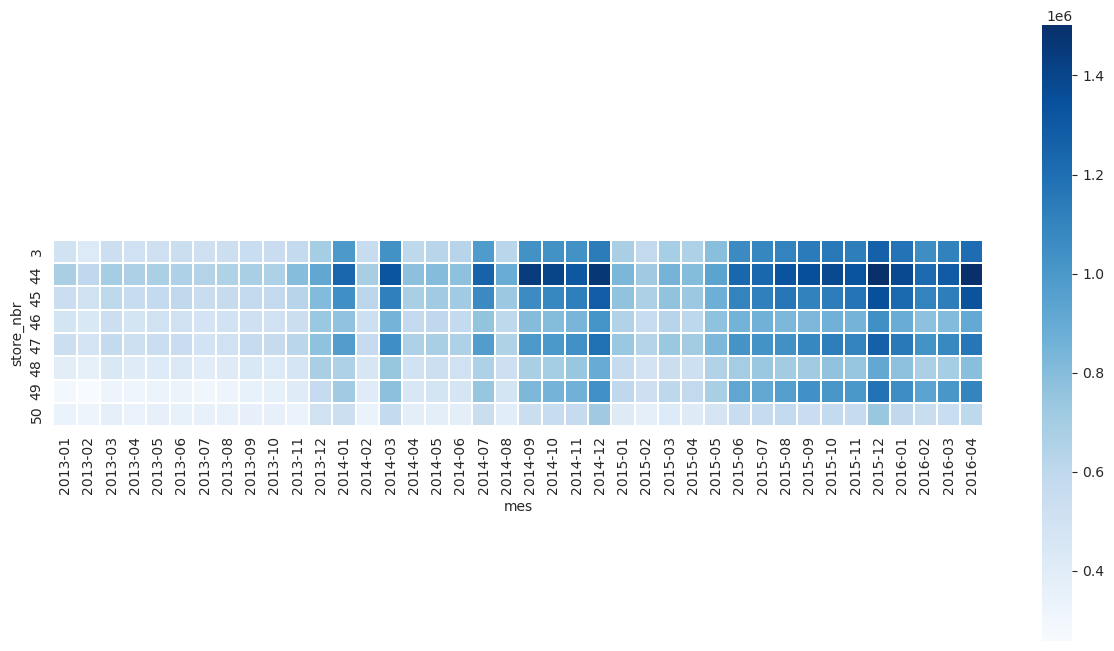

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(
    matrix_mapa_calor,
    cmap='Blues',
    square=True,
    linewidth=0.1,
    #annot=True COLOCAR VALORE DENTRO DE HEATMAP
)

Mapa de calor de Matrix Correlacion

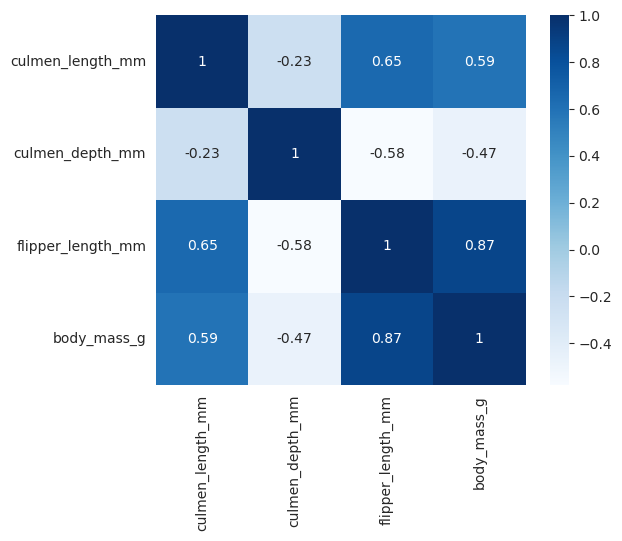

In [40]:
# Graficamos con seaborn
df_cor = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(
    df_cor,
    annot=True,
    cmap='Blues',
    square=True
)

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()